In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    

In [2]:
data = pd.read_csv(r'C:\Users\IT Rajbhawan\Desktop\pythonpro\miniproject\handwritten_character_recognition\handwrittendata.csv').astype('float32')


In [3]:
data.head(2)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X = data.drop('0',axis = 1)
y = data['0']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


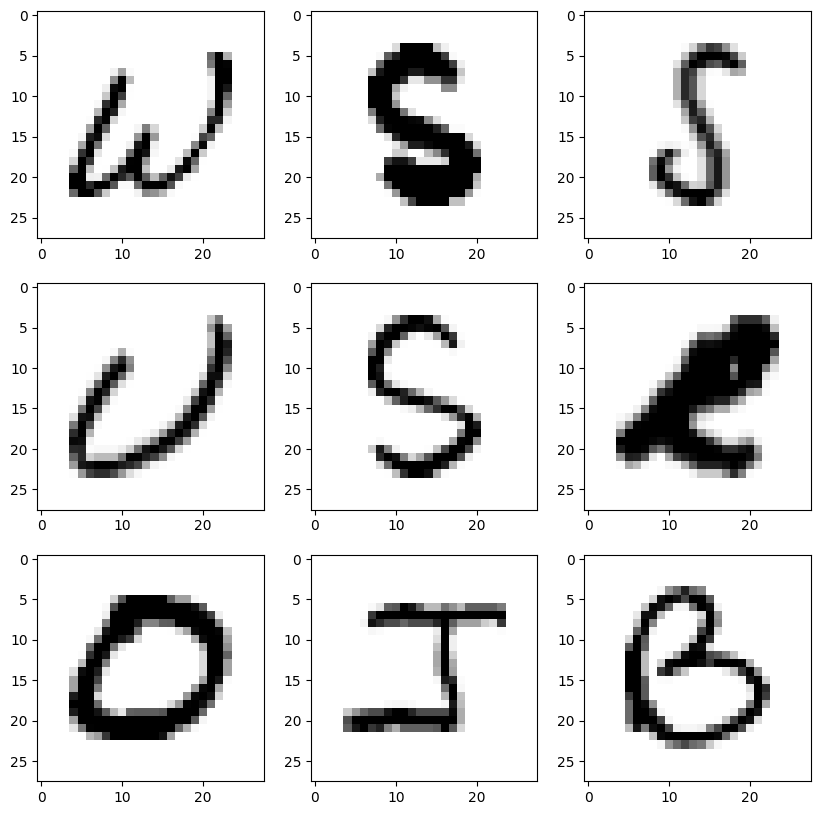

In [6]:
import cv2
shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

In [7]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [8]:
from tensorflow.keras.utils import to_categorical

y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)

New shape of training labels:  (297960, 26)
New shape of testing labels:  (74490, 26)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [10]:
model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [11]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5
9312/9312 [==============================] - 227s 24ms/step - loss: 0.2104 - accuracy: 0.9397 - val_loss: 0.1369 - val_accuracy: 0.9610
Epoch 2/5
9312/9312 [==============================] - 220s 24ms/step - loss: 0.1121 - accuracy: 0.9686 - val_loss: 0.1223 - val_accuracy: 0.9666
Epoch 3/5
9312/9312 [==============================] - 237s 25ms/step - loss: 0.0970 - accuracy: 0.9732 - val_loss: 0.0961 - val_accuracy: 0.9738
Epoch 4/5
9312/9312 [==============================] - 273s 29ms/step - loss: 0.0886 - accuracy: 0.9758 - val_loss: 0.0912 - val_accuracy: 0.9754
Epoch 5/5
9312/9312 [==============================] - 268s 29ms/step - loss: 0.0842 - accuracy: 0.9774 - val_loss: 0.0854 - val_accuracy: 0.9770


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [13]:
model.save(r'handwritten_character_recog_model.keras')

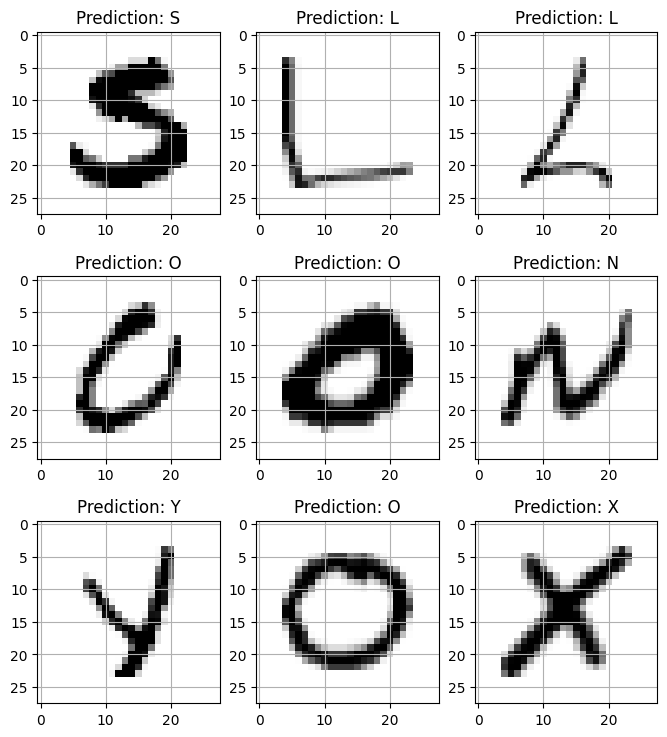

In [15]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [52]:
from tkinter import *
from tkinter.ttk import *
import PIL.ImageGrab
from PIL import Image
from keras.models import load_model
import numpy as np

# load model
model = load_model(
    r"C:\\Users\\IT Rajbhawan\Desktop\\pythonpro\\miniproject\\handwritten_character_recognition\\handwritten_character_recog_model.keras"
)

# create global variables
operator = "Prediction : "
operator2 = ""


# create function to clear canvas and text
def Clear():
    cv.delete("all")
    global operator2
    text_input.set(operator2)


# create function to predict and display predicted number
def Predict():
    file = "D:/image.jpg"
    if file:
        # save the canvas in jpg format
        x = cv.winfo_rootx()
        y = cv.winfo_rooty()+10
        x1 = x + cv.winfo_width()+12
        y1 = y + cv.winfo_height()+19
        PIL.ImageGrab.grab().crop((x, y, x1, y1)).save(file)

        # convert to greyscale
        img = Image.open(file).convert("L")

        # resize image
        img = img.resize((28, 28))

        # convert image to array
        im2arr = np.array(img)

        # reshape array
        im2arr = im2arr.reshape(1, 28, 28, 1)

        # predict class
        words = {
            0: "A",
            1: "B",
            2: "C",
            3: "D",
            4: "E",
            5: "F",
            6: "G",
            7: "H",
            8: "I",
            9: "J",
            10: "K",
            11: "L",
            12: "M",
            13: "N",
            14: "O",
            15: "P",
            16: "Q",
            17: "R",
            18: "S",
            19: "T",
            20: "U",
            21: "V",
            22: "W",
            23: "X",
            24: "Y",
            25: "Z",
        }
        img_pred = words[np.argmax(model.predict(im2arr))]

        # display predicted character
        global operator
        operator = operator + img_pred
        text_input.set(operator)
        operator = operator = "Prediction : "


# create function to draw on canvas
def paint(event):
    old_x = event.x
    old_y = event.y

    cv.create_line(
        old_x,
        old_y,
        event.x,
        event.y,
        width=20,
        fill="white",
        capstyle=ROUND,
        smooth=TRUE,
        splinesteps=36,
    )


# all interface elements must be between Tk() and mainloop()
root = Tk()

# create string variable
text_input = StringVar()

# create field to display text
textdisplay = Entry(root, textvariable=text_input, justify="center")

# create predict and clear buttons
btn1 = Button(root, text="Predict", command=lambda: Predict())
btn2 = Button(root, text="Clear", command=lambda: Clear())

# create canvas to draw on
cv = Canvas(
    root,
    width=200,
    height=200,
    bg="black",
)

# using left mouse button to draw
cv.bind("<B1-Motion>", paint)

# organise the elements
cv.grid(row=0, column=0)
textdisplay.grid(row=0, column=1)
btn1.grid(row=1, column=0)
btn2.grid(row=1, column=1)

# this 2 lines for expand the interface
root.rowconfigure(0, weight=2)
root.columnconfigure(1, weight=2)

root.mainloop()

1/1 [==============================] - 0s 17ms/step
